In [ ]:
#Python Script for Network Analysis

#1: Summarise Ego and then remove from network
#2: Network Structure Analysis and export DF
#3: Network Centrality Analysis and add to DF

In [28]:
#Import Packages
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import requests
import collections
sns.set()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/solveighosborne/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
#Set Language
lang = 'en'

In [30]:
#IMPORT DATA
os.chdir('path')
DF = pd.read_csv('%s_edgelist.csv' %lang)
NET = nx.from_pandas_edgelist(DF, create_using=nx.DiGraph())

In [31]:
#Summary Statistics of the EGO
art = 'World War II'
#art = 'Zweiter Weltkrieg'

print('\nDegree of EGO')
deg = NET.degree()
print(deg[art])

print('\nIn-Degree of EGO')
indeg = NET.in_degree()
print(indeg[art])

print('\nOut-Degree of EGO')
outdeg = NET.out_degree()
print(outdeg[art])

#Network Structure Analysis with EGO
print(nx.info(NET))

In [32]:
# Remove EGO article from NETWORK
NET.remove_node(art)
print('\nCan confirm: have removed Ego from Edgelist.')

#Network Structure Analysis
print(nx.info(NET))


Can confirm: have removed Ego from Edgelist.
Name: 
Type: DiGraph
Number of nodes: 163008
Number of edges: 7196039
Average in degree:  44.1453
Average out degree:  44.1453


In [10]:
# Examine Degree Distribution
net_ego = pd.DataFrame(index=list(NET.nodes))
net_ego["In-Degree"] = pd.Series(dict(nx.in_degree_centrality(NET)))
net_ego["PageRank"] = pd.Series(dict(nx.pagerank(NET)))

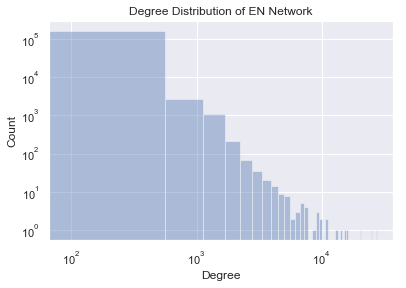

In [33]:
deg_sequence = sorted([d for n, d in NET.degree()], reverse=True)
fig, ax = plt.subplots()
sns.distplot(deg_sequence, kde=False, rug=False).set_title('Degree Distribution of EN Network')
plt.ylabel("Count")
plt.xlabel("Degree")
plt.tight_layout() 
ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig('EN_NET_DEGDIST.png')

In [ ]:
#Network Structure Analysis
print('Self-loops:',NET.number_of_selfloops(),'\n')
density = nx.density(NET)
print('\nDensity', density)

num_nodes = nx.number_of_nodes(NET)
num_edges = nx.number_of_edges(NET)
avdeg = num_edges / num_nodes
print('Average Degree', avdeg)

clust = nx.average_clustering(NET)
print('Clustering', clust)

recip = nx.reciprocity(NET)
print('Recipricoity Directed Graph',recip)

print('\nCount of Weakly Connected Components:')
num_nodes_wego = nx.number_of_nodes(NET)
wcego_count = 0
for c in nx.weakly_connected_components(NET): 
    wcego_count += 1
print(wcego_count)
print("\nPrinting values in Components (if >50%, then GC)")
for i in [c for c in nx.weakly_connected_components(NET) if len(c) > 1]: print(len(i)) 

print('\nCount of Strongly Connected Components:')
num_nodes_sego = nx.number_of_nodes(NET)
scego_count = 0
for c in nx.strongly_connected_components(NET): 
    scego_count += 1
print(scego_count)
print("\nPrinting values in Components (if >50%, then GC)")
for i in [c for c in nx.strongly_connected_components(NET) if len(c) > 1]: print(len(i)) 

In [ ]:
# Get percentage of nodes in largest weak and strong components. If more thn 50%, then giant component.

# % in WC, adjust number
pc_lc = X/num_nodes #replace X with number of nodes in component
print("{:.2%}".format(pc_lc))

# % in SC, adjust number
pc_slc = X/num_nodes #replace X with number of nodes in component
print("{:.2%}".format(pc_slc))

In [ ]:
#Pickle Dataframe for later
summary = {'Lang':[lang],
          'Nodes': [num_nodes],
          'Edges': [num_edges],
          'Av. Degree': [avdeg],
          'Density': [density],
          'Clustering': [clust],
          'Reciprocity': [recip],
          'Weak Components': [wc_count],
          'Giant Weak Component (%)': [pc_lc],
          'Strong Components':[sc_count],
          'Giant Strong Component (%)': [pc_slc]
          }

Summary = pd.DataFrame.from_dict(summary)
Summary = Summary.round({'Nodes': 0, 
                         'Edges': 0, 
                         'Av. Degree':0,
                         'Density':4,
                         'Clustering':4,
                         'Reciprocity':4, 
                         'Weak Components':0,
                         'Giant Weak Component (%)':3,
                         'Strong Components':0,
                         'Giant Strong Component (%)':3                       
                        })

display(Summary)

In [ ]:
os.chdir('path')

#export net table
Summary.to_csv('%s_NetSummary.csv'%lang, encoding='utf_8_sig')

In [ ]:
#ANALYSE CENTRALITIES

In [ ]:
#Import nodelist
lang = 'en'
nodes = pd.DataFrame(index=list(NET.nodes))
nodes["In-Degree"] = pd.Series(dict(nx.in_degree_centrality(NET)))
nodes["PageRank"] = pd.Series(dict(nx.pagerank(NET)))
nodes.columns = ['Article', 'In-Degree','PageRank']
nodes = nodes.set_index('Article')
display(nodes.head())

#Save node list with centrality scores
nodes = pd.read_csv('en_nodelist.csv')

In [ ]:
#Rank node lists by PageRank
ranked_PR = nodes.sort_values(by='PageRank', ascending=False)
display(ranked_PR)

#Save to CSV
ranked_PR.to_csv('%s_rankedPageRank.csv' %lang, encoding='utf_8_sig')

In [ ]:
#Rank node lists by In-Degree
ranked_ID = nodes.sort_values(by='In-Degree', ascending=False)
display(ranked_ID)

#Save to CSV
ranked_ID.to_csv('%s_rankedInDegree.csv' %lang, encoding='utf_8_sig')